# Validation of Recommender System
Here we perform a validation study to assess the performance of the recommender system.  We compare the item-to-item and user-to-user approaches, and show that both outperform baseline methods such as recommending a list of popular items, or recommending random items to each user.

## Get data
We first retrieve wishlist and collection data stored in local csv files.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pymongo import MongoClient
from pprint import pprint
import operator
from skimage import io
from scipy import sparse

import recommender as rec
import time

In [2]:
# load databases
db = open('db.txt', 'r').readline().split(',')
domainDb = MongoClient(db[0], readPreference="secondary")[db[1]]
catalogDb = MongoClient(db[2], readPreference="secondary")[db[3]]

# load collections
items = catalogDb["moduleitems"]
users = domainDb["users"]
wantitems = domainDb["wantlistitems"]
haveitems = domainDb["collectionitems"]

# import local data containing user wishlists
wishlist_df = pd.read_csv('data/wishlistdf.csv', index_col=0)
havelist_df = pd.read_csv('data/havelistdf.csv', index_col=0)
wishlist_np = wishlist_df.as_matrix()
havelist_np = havelist_df.as_matrix()

# put everything into ratings matrix
ratings = wishlist_np + havelist_np

print('Users:', ratings.shape[0])
print('Items:', ratings.shape[1])

Users: 18015
Items: 9744


## Validation
The Recommender class is interfaced with a validation framework that conducts k-fold cross validation.  In each fold, items are held out from the wishlists and collection of users.  Then, the recommender system is used to predict whether or not those items are relevant to the user.

The validation is conducted as a function of N (the number of recommendations per user), the type of recommendations, and the number of cross-validation folds.

Here, we demonstrate the framework for a single configuration.  Plots summarizing multiple runs of the validation are shown below.

In [3]:
rec.run_validation(ratings, kind='item',
                   nfolds=5, nrecitems=10, onefold=True)

Running validation with N = 10 ...
... fold 1 / 5
Calculating item based similarity matrix...
done!
Getting user predictions...


/Users/nathan/Documents/Insight/Covetly/covetly_recommender/recommender.py:63: RuntimeWarning: invalid value encountered in true_divide
  / np.array([np.abs(self.similarity).sum(axis=1)])


done!
removing items already selected by user...
calculating roc...
TP, FP, TN, FN =  30225.0 149925.0 175011472.0 346538.0
Precision: 0.16777685262281433
True positive rate: 0.08022284566159628
False positive rate: 0.0008559248930858892
User precision: 0.16777685262280162
User recall: 0.15405524873043774


(30225.0,
 149925.0,
 175011472.0,
 346538.0,
 0.16777685262280162,
 0.15405524873043774)

## Validation results
We have run the validation above for multiple configurations of the recommender algorithm.  Validation plots summarizing the results are shown below.

In [4]:
# get validation results
precision_df = pd.read_csv("precision.csv").dropna()
recall_df = pd.read_csv("recall.csv").dropna()

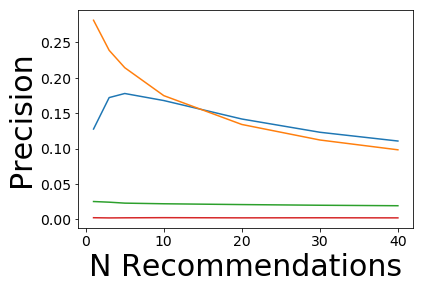

In [5]:
# Precision vs N Recommendations
plt.figure()
plt.plot(precision_df['N'], precision_df['item'])
plt.plot(precision_df['N'], precision_df['user'])
plt.plot(precision_df['N'], precision_df['popular'])
plt.plot(precision_df['N'], precision_df['random'])
plt.xlabel('N Recommendations', fontsize=30)
plt.ylabel('Precision', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

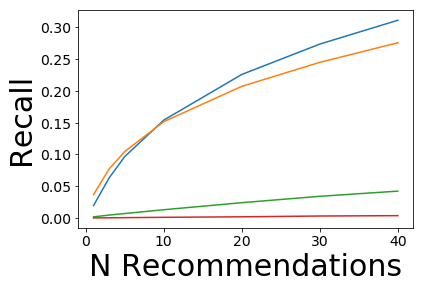

In [6]:
# Recall vs N Recommendations
plt.figure()
plt.plot(recall_df['N'], recall_df['item'])
plt.plot(recall_df['N'], recall_df['user'])
plt.plot(recall_df['N'], recall_df['popular'])
plt.plot(recall_df['N'], recall_df['random'])
plt.xlabel('N Recommendations', fontsize=30)
plt.ylabel('Recall', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

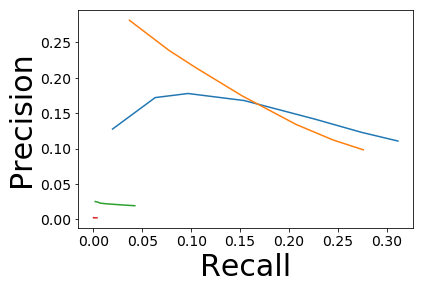

In [7]:
# Precision vs Recall
plt.figure()
plt.plot(recall_df['item'], precision_df['item'])
plt.plot(recall_df['user'], precision_df['user'])
plt.plot(recall_df['popular'], precision_df['popular'])
plt.plot(recall_df['random'], precision_df['random'])
plt.xlabel('Recall', fontsize=30)
plt.ylabel('Precision', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

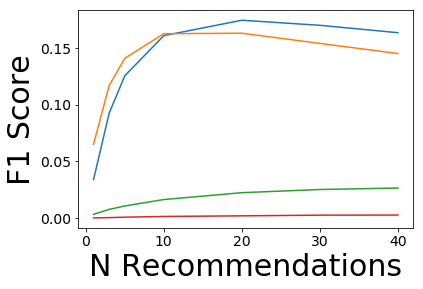

In [8]:
# F1 Score vs N Recommendations
plt.figure()
plt.plot(recall_df['N'], (2*precision_df['item']*recall_df['item'])/(precision_df['item']+recall_df['item']))
plt.plot(recall_df['N'], (2*precision_df['user']*recall_df['user'])/(precision_df['user']+recall_df['user']))
plt.plot(recall_df['N'], (2*precision_df['popular']*recall_df['popular'])/(precision_df['popular']+recall_df['popular']))
plt.plot(recall_df['N'], (2*precision_df['random']*recall_df['random'])/(precision_df['random']+recall_df['random']))
plt.xlabel('N Recommendations', fontsize=30)
plt.ylabel('F1 Score', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()